In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
from collections import Counter
from collections import OrderedDict
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
data = pd.read_csv(r'F:\Winter pack\Introduction to Game Development\Project on DA\Projects\Project_3(Concept Map)\Data\Hot Metal data for Praveen.csv')
data['investigation Report'] = data['Investigation Report'].fillna("Nan", inplace = True)

In [7]:
# Data Preprocessing 
# Remove stopwords
stopword = set(stopwords.words('english'))
unrelevent = {'we', 'We','have','has','for', 'from', 'they','there','while','the', 'is','both','with','and', 'were', 'but','any','who','ah','80x5', 'e4', 'tff','55pm', }
#ab = stopword
#unrelevent.append(ab)
#print(unrelevent)
for i in unrelevent:
    stopword.add(i)
print(len(stopword))
#x_train = data['Brief Description']

185


In [8]:
vect = TfidfVectorizer(analyzer='word',token_pattern=r'\b[^\d\W]+\b',stop_words = stopword).fit(data['Brief Description'])

In [9]:
len(vect.get_feature_names())

1496

In [10]:
vector =  vect.fit_transform(data['Brief Description'])

In [11]:
a = []
for key, item in vect.vocabulary_.items():
    a.append(key)

frame = pd.DataFrame(vector.toarray(), columns=a)

v = vector.toarray()

In [12]:
feature_names = vect.get_feature_names()
#this gives you the list of all the tokens or n-grams or words. For the first document in your corpus,
doc = vector.shape[0]

outer_dict ={}
for i in range(doc):
    feature_index = vector[i,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [vector[i, x] for x in feature_index])
    inner_dict = {}
    for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
        if len(w)>2:
            inner_dict[w] = s
    outer_dict[i] = inner_dict.items()

In [14]:
vect_invest_repo = TfidfVectorizer(analyzer='word',token_pattern=r'\b[^\d\W]+\b',stop_words = stopword).fit(data['Investigation Report'])

In [15]:
vector_invest_rep =  vect_invest_repo.fit_transform(data['Investigation Report'])

feature_names = vect_invest_repo.get_feature_names()
#this gives you the list of all the tokens or n-grams or words. For the first document in your corpus,
doc_1 = vector_invest_rep.shape[0]

outer_dict_invest_rep ={}
for i in range(doc_1):
    feature_index = vector_invest_rep[i,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [vector_invest_rep[i, x] for x in feature_index])
    inner_dict = {}
    for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
        if len(w)>2:
            inner_dict[w] = s
    outer_dict_invest_rep[i] = inner_dict.items()

In [17]:
# brief discription and investigation Report for different Initiating mechanism
initia_mec = data['Initiating mechanism'].unique().tolist()
# find index of brief discription and investigation Report for different initiation mechanism
initiation_mec = {}
for j in initia_mec:
    a = []
    for i in range(len(data)):
        if data['Initiating mechanism'][i] == j:
            a.append(i)
    initiation_mec[j] = a

In [18]:
accident_feature = data['Accident/ incident'].unique().tolist()
# initiating mechanism that relate to accident feature
acc_index = {}
for j in accident_feature:
    a ={}
    for i in range(len(data)):
        if data['Accident/ incident'][i] == j:
            b = data['Initiating mechanism'][i]
            a[b] = initiation_mec[b]
    acc_index[j] = a

#### Read Data

In [22]:
import warnings
warnings.filterwarnings('ignore')
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
node0 = data['Hazardous Element'].unique().tolist()
node1 = data['Initiating mechanism'].unique().tolist()
node2 = data['Accident/ incident'].unique().tolist()

In [31]:
in_dict = {}
for i in node1:
    a = []
    for j in range(len(data)):
        if data['Initiating mechanism'][j] == i:
            a.append(data['Accident/ incident'][j])
    in_dict[i] = a
node = [node0,node1,node2]

In [33]:
G = nx.Graph()
for i in node:
    for j in i:
        G.add_node(j)

In [37]:
c_value = []
for i in range(len(G.nodes())):
    if G.nodes()[i] != G.nodes()[0] and (i<11):  
        c_value.append([G.nodes()[0], G.nodes()[i]])
o_value = []
for key,value in in_dict.items():
    b = []
    for j in value:
        o_value.append([key, j])

In [38]:
G.add_edges_from(c_value)
G.add_edges_from(o_value)
nx.write_edgelist(G, "test_edgelist.txt")

options = {
    'edge_color': '#ffdf55',
    'width': 5,
    'with_labels': True,
    'font_weight': 'regular',
    #'edge_labels': 'edge_labels'
}

In [42]:
value = []
for i in range(len(G.nodes())):
    if i==0:
        value.append('#FF0000')
    elif i>0 and i<11:
        value.append('#FF8C00')
    else:
        value.append('#FFFF00')

In [84]:
edges = []
for edge in G.edges():
    edges.append(edge[0])
my_dict = {i:edges.count(i) for i in edges}
size = []
for key, value in my_dict.items():
        size.append(value)
secondary_edge = []
for i in range(len(G.edges())):
    if i>10:
        secondary_edge.append(G.edges()[i][1])
secondary = []
my_dict = {i:secondary_edge.count(i) for i in secondary_edge}

s = []
for  i in range(len(G.nodes())):
    if i>10:
        s.append(my_dict[G.nodes()[i]])
for i in s:
    size.append(i)

for i in range(len(size)):
    size[i] = size[i]*1500

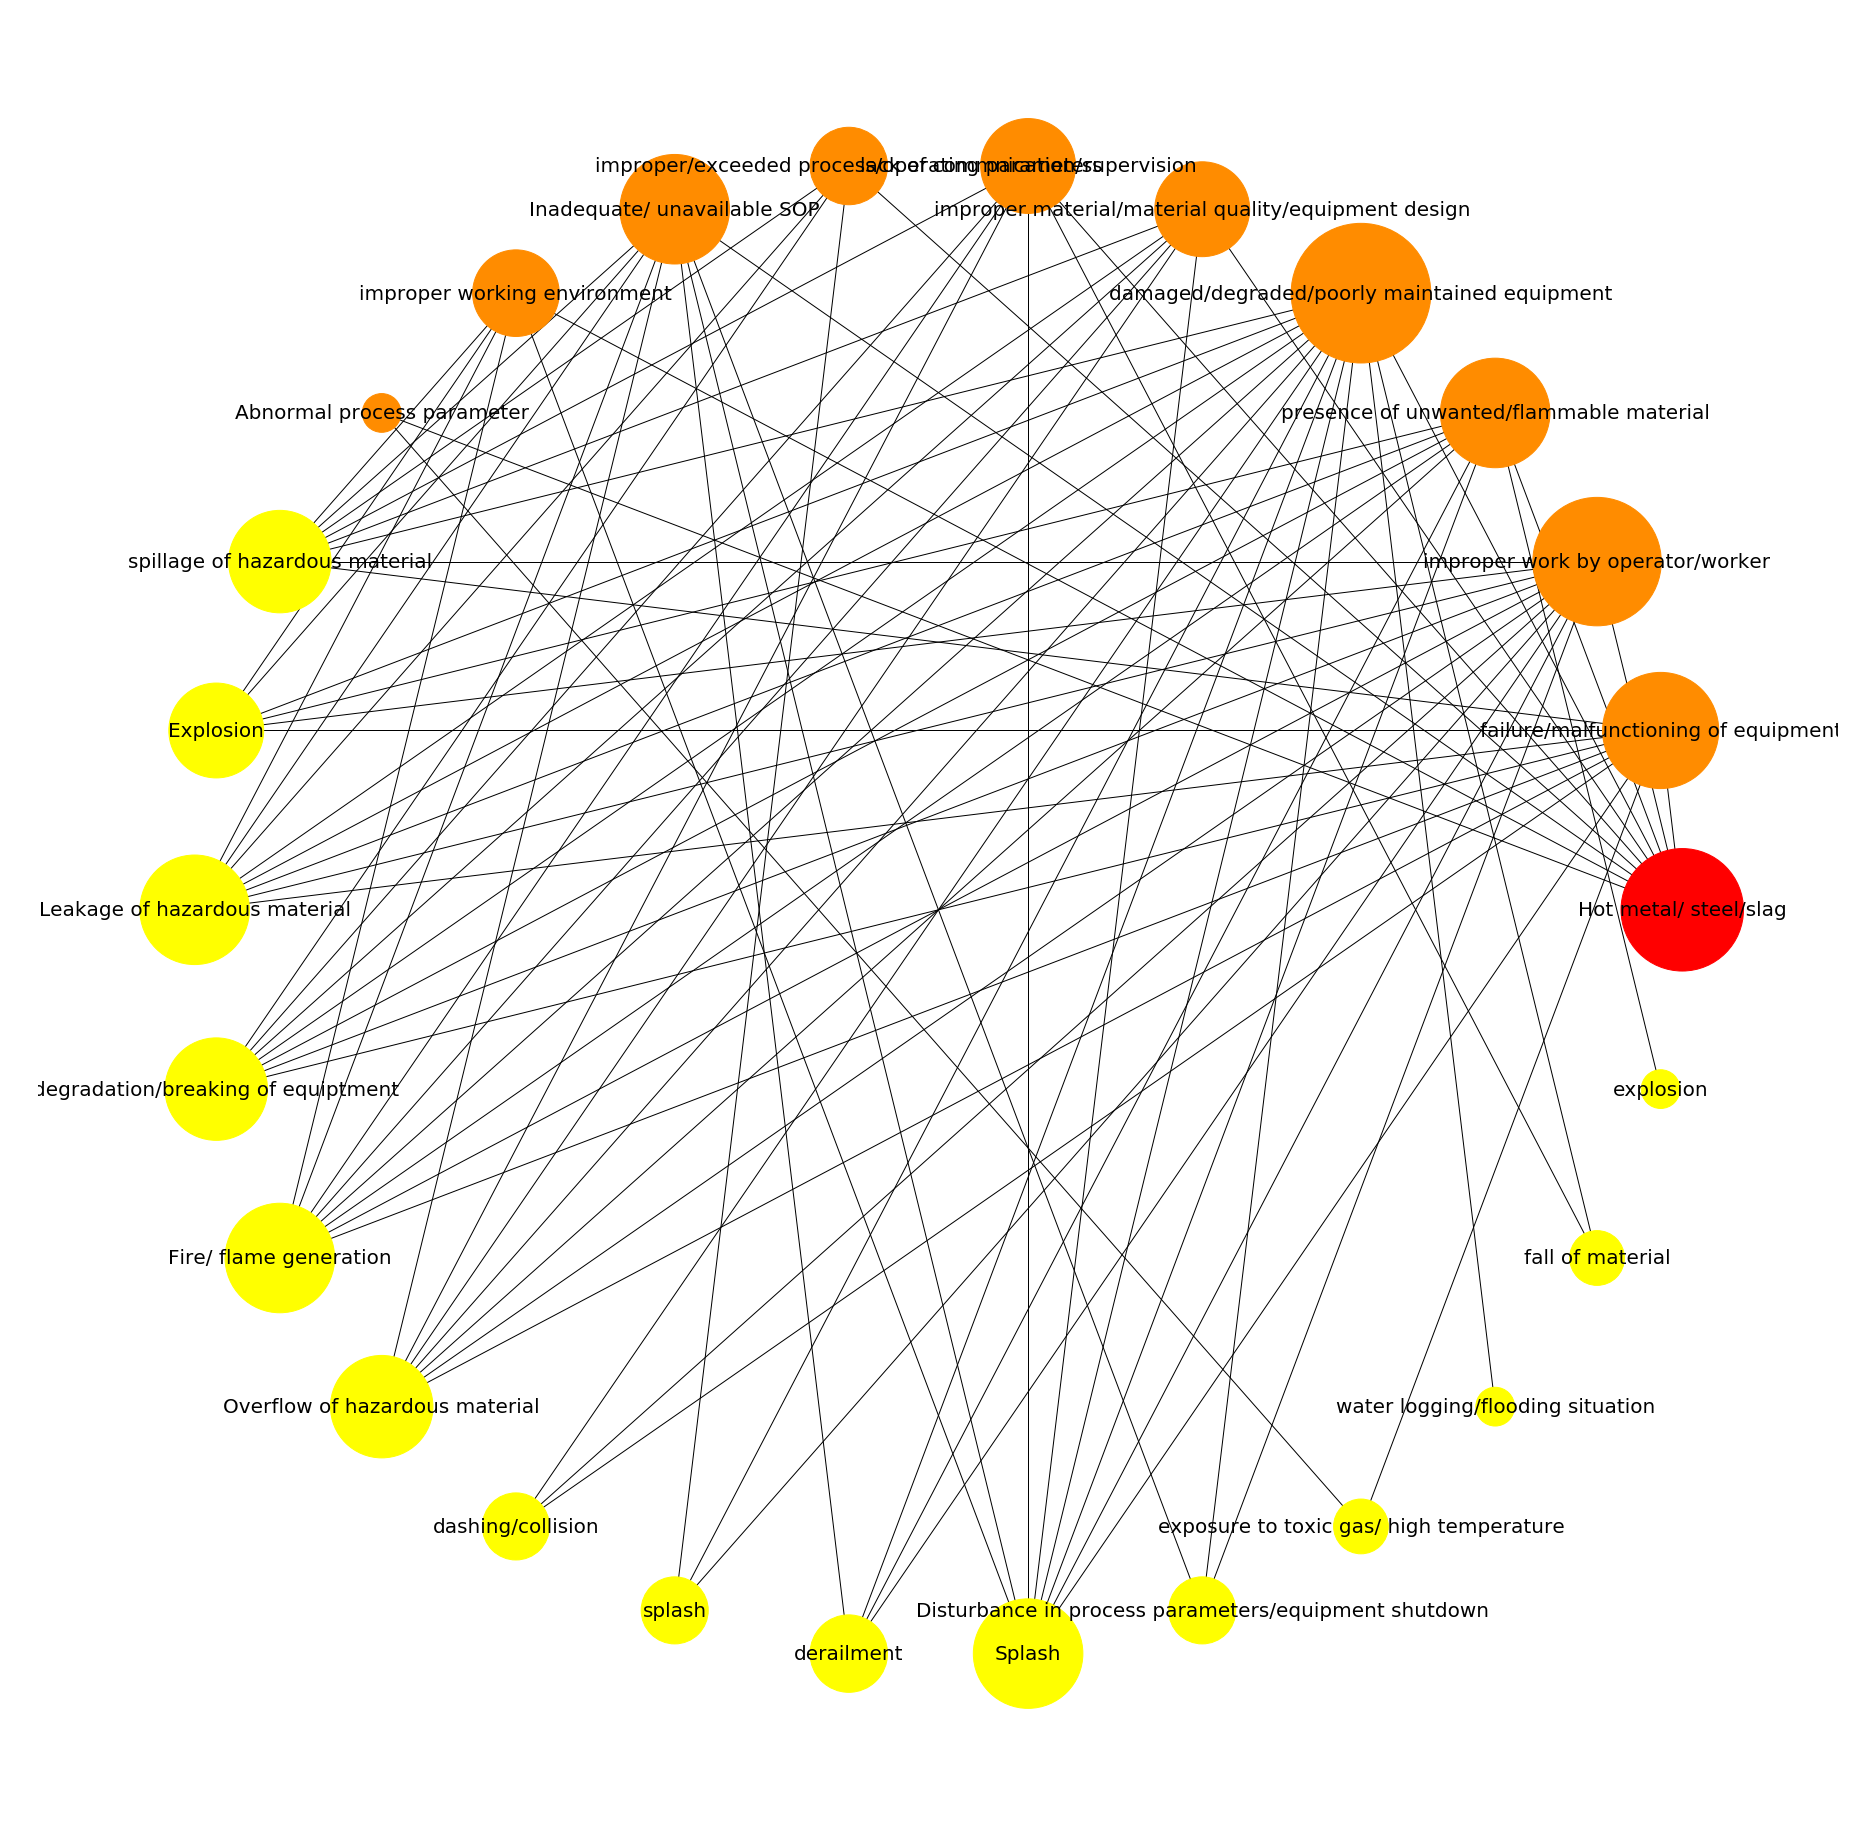

<Figure size 432x288 with 0 Axes>

In [44]:
%matplotlib inline
import pylab
from matplotlib.pyplot import figure
pos=nx.circular_layout(G)
plt.figure(figsize=(25,25))
nx.draw(G,pos, node_size=size,node_color=value, with_labels = True,arrowsize=5, font_size = 20,  arrows = True)
#edge_labels=dict([((u,v,),d['weight'])
                 #for u,v,d in G.edges(data=True)]
plt.show()
#plt.axis('off')
pylab.savefig("foo.png")

#### Working on word

In [46]:
brief_d = pd.read_csv(r'F:\Winter pack\Introduction to Game Development\Project on DA\Projects\Project_3(Concept Map)\result\New folder\Brief Data.csv')
invest_d = pd.read_csv(r'F:\Winter pack\Introduction to Game Development\Project on DA\Projects\Project_3(Concept Map)\result\New folder\invest Data.csv')

In [47]:
for i in brief_d.columns:
    for j in range(len(brief_d[i])):
        brief_d[i].values[j] = brief_d[i].values[j].replace('"', '')
        brief_d[i].values[j] = brief_d[i].values[j].replace(' ', '')

for i in invest_d.columns:
    for j in range(len(invest_d[i])):
        invest_d[i].values[j] = invest_d[i].values[j].replace('"', '')
        invest_d[i].values[j] = invest_d[i].values[j].replace(' ', '')

In [50]:
# brief_d, invest_d
# outer_dict, outer_dict_invest_rep, acc_index, initiation_mec

In [221]:
list_brief_word = []
for i in brief_d.columns:
    for j in brief_d[i]:
        list_brief_word.append(j)

In [222]:
list_ = []
for i in list_brief_word:
    if len(i)>2:
        list_.append(i)
list_brief_word = list_

In [237]:
len(unique_words_in_brief)

157

In [236]:
unique_words_in_brief = set(list_brief_word)

In [226]:
list_invest_word = []
for i in invest_d.columns:
    for j in invest_d[i]:
        list_invest_word.append(j)

list_ = []
for i in list_invest_word:
    if len(i)>2:
        list_.append(i)
list_invest_word = list_

unique_words_in_invest = set(list_invest_word)

In [227]:
len(unique_words_in_invest)

107

##### Find index and word with tfidf in brief

In [250]:
word_brief = []
tfidf_word_brief = []
index_brief = []
for i, j in outer_dict.items():
        j= dict(j)
        for key,value in j.items():
            if word_brief is not None and key not in word_brief:
                word_brief.append(key)
                tfidf_word_brief.append(value)
                index_brief.append(i)
            else:
                k = word_brief.index(key)
                x = tfidf_word_brief[k]
                y = value
                if y>x:
                    tfidf_word_brief[k] = y
                    index_brief[k] = i

In [251]:
word_list_brief = []
word_index_brief = []
word_tfidf_brief = []
for i in word_brief:
    if i in unique_words_in_brief:
        word_list_brief.append(i)
        x = word_brief.index(i)
        word_index_brief.append(index_brief[x])
        word_tfidf_brief.append(tfidf_word_brief[x])

In [252]:
# check length of unique_words_in_brief and word_list_brief and they are equal
len(unique_words_in_brief)

157

##### Find index and word with tfidf in invest

In [258]:
word_invest = []
tfidf_word_invest = []
index_invest = []
for i, j in outer_dict_invest_rep.items():
        j= dict(j)
        for key,value in j.items():
            if word_invest is not None and key not in word_invest:
                word_invest.append(key)
                tfidf_word_invest.append(value)
                index_invest.append(i)
            else:
                k = word_invest.index(key)
                x = tfidf_word_invest[k]
                y = value
                if y>x:
                    tfidf_word_invest[k] = y
                    index_invest[k] = i

In [259]:
word_list_invest = []
word_index_invest = []
word_tfidf_invest = []
for i in word_invest:
    if i in unique_words_in_invest:
        word_list_invest.append(i)
        x = word_invest.index(i)
        word_index_invest.append(index_invest[x])
        word_tfidf_invest.append(tfidf_word_invest[x])

In [260]:
# check length of unique_words_in_invest and word_list_invest and they are equal
len(unique_words_in_invest)

107

In [262]:
len(word_list_invest)

107

### final

In [274]:
# collect word w.r.t initiating mec 
word_define_initiating_mec = {}
for key,value in initiation_mec.items():
    iner = {}
    for j in value:
        if j in word_index_brief:
            x_brief = word_index_brief.index(j)
            iner[word_list_brief[x_brief]] = word_tfidf_brief[x_brief]
        if j in word_index_invest:
            x_invest = word_index_invest.index(j)
            iner[word_list_invest[x_invest]] = word_tfidf_invest[x_invest]
    word_define_initiating_mec[key] = iner

#### for accident data

In [284]:
accident = data['Accident/ incident'].unique().tolist()
# find index of brief discription and investigation Report for different initiation mechanism
accident_inci = {}
for j in accident:
    a = []
    for i in range(len(data)):
        if data['Accident/ incident'][i] == j:
            a.append(i)
    accident_inci[j] = a

In [293]:
word_define_accident = {}
for key,value in accident_inci.items():
    iner = {}
    for j in value:
        if j in word_index_brief:
            x_brief = word_index_brief.index(j)
            iner[word_list_brief[x_brief]] = word_tfidf_brief[x_brief]
        if j in word_index_invest:
            x_invest = word_index_invest.index(j)
            iner[word_list_invest[x_invest]] = word_tfidf_invest[x_invest]
    word_define_accident[key] = iner

### Make word graph of Initialting mechanism

In [518]:
G = nx.Graph()

In [519]:
node0 = ['Hot metal/ steel/slag', 'Initiating mechanism']
node1 = data['Initiating mechanism'].unique().tolist()

In [520]:
a = []
v = []
edge2 = []
for key,value in word_define_initiating_mec.items():  
    value = dict(value)
    for i, j in value.items():
        if i not in a:
            a.append(i)
            edge2.append([key,i])
            v.append(j)
        else:
            l = a.index(i)
            y = v[l]
            if j>y:
                v[l] = j

In [521]:
node2 = a
node = [node0, node1, node2]

In [522]:
for i in node:
    for j in i:
        G.add_node(j)

In [523]:
edge0 = [node0]

In [524]:
edge1 = []
for i in range(15):
    if i>1 and i<12:
        edge1.append([G.nodes()[1], G.nodes()[i]])

In [525]:
G.add_edges_from(edge0)
G.add_edges_from(edge1)
G.add_edges_from(edge2)

In [526]:
# Add size
size_1 = [50]

In [527]:
size0 = []
for i in data['Initiating mechanism']:
    size0.append(i)
my_dict = {i:size0.count(i) for i in size0}
size0 = []
for key, value in my_dict.items():
        size0.append(value)

In [528]:
size0

[40, 79, 13, 49, 14, 8, 4, 36, 7, 1]

In [529]:
size1 = v

In [530]:
sizes = []
for i in size_1:
    sizes.append(i)

for i in size0:
    sizes.append(i)
    
for i in size1:
    sizes.append(i)
for i in range(len(sizes)):
    sizes[i] = sizes[i]*300
    if i>11:
        sizes[i] = sizes[i]*3

In [532]:
color0 = ['Red', '#0A3557']
color = ['#F26C3A', '#F2A13A', '#AFF23A', '#3AF285', '#3AF2D9', '#3AAAF2', '#3A80F2', '#483AF2', '#8E3AF2', '#F23AEA']

In [534]:
types = []
types_word= []
type_color = []
a = []
k = 0
for key,value in word_define_initiating_mec.items():
    for i, j in value.items():
        if i not in a:
            a.append(i)
            type_color.append(color[k])
    k += 1
    types_word.append(b)

In [535]:
color0 = ['Red', '#0A3557']
color = ['#F26C3A', '#F2A13A', '#AFF23A', '#3AF285', '#3AF2D9', '#3AAAF2', '#3A80F2', '#483AF2', '#8E3AF2', '#F23AEA']
for i in color:
    color0.append(i)

In [536]:
for i in type_color:
    color0.append(i)

In [537]:
len(color0)

179

In [551]:
# Add Edge color
edge0 = ['Red']
for i in color:
    edge0.append('#0A3557')
for i in type_color:
    edge0.append(i)

In [552]:
len(edge0)

178

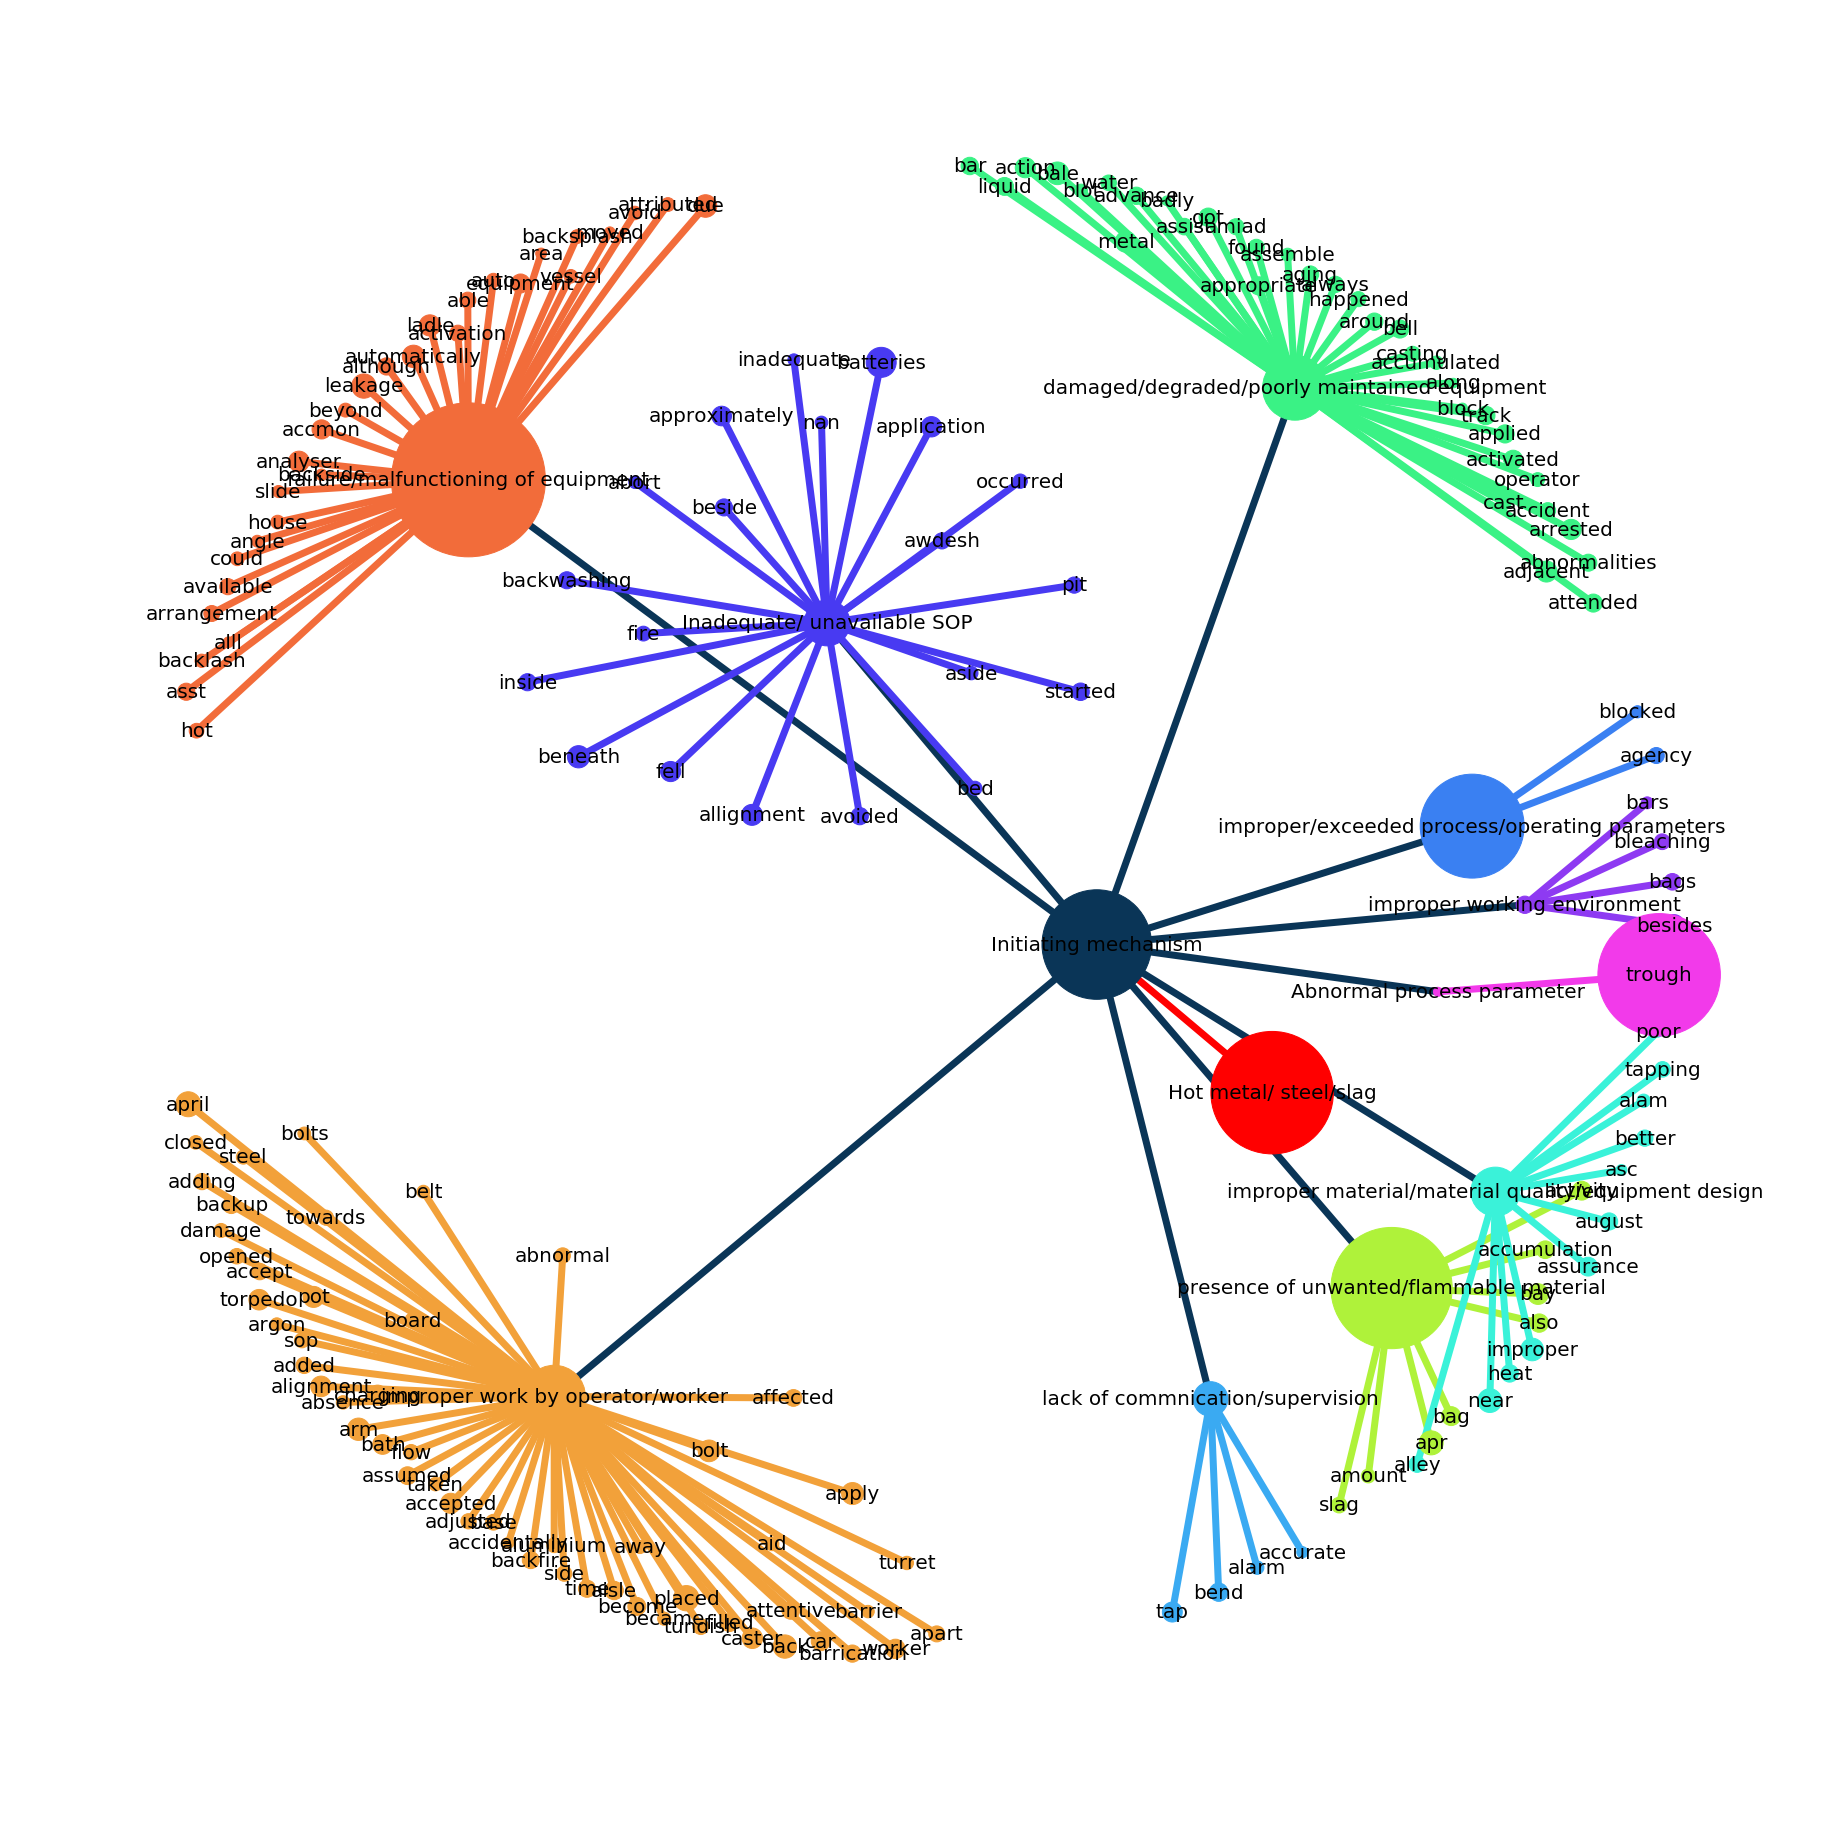

<Figure size 432x288 with 0 Axes>

In [559]:
%matplotlib inline
import pylab
from matplotlib.pyplot import figure
from networkx.drawing.nx_agraph import graphviz_layout
pos=nx.spring_layout(G)
plt.figure(figsize=(25,25))
nx.draw(G,pos, node_size=sizes,node_color=color0,edge_color=edge0,edge_cmap=plt.cm.Reds, with_labels = True,arrowsize=5,width=7 ,font_size = 20,  arrows = True)
#edge_labels=dict([((u,v,),d['weight'])
                 #for u,v,d in G.edges(data=True)]
plt.show()
#plt.axis('off')
pylab.savefig("foo.png")

### Make word graph of accident/ incident

In [561]:
G = nx.Graph()
node0 = ['Hot metal/ steel/slag', 'Accident/incident']
node1 = data['Accident/ incident'].unique().tolist()

In [562]:
a = []
v = []
edge2 = []
for key,value in word_define_accident.items():  
    value = dict(value)
    for i, j in value.items():
        if i not in a:
            a.append(i)
            edge2.append([key,i])
            v.append(j)
        else:
            l = a.index(i)
            y = v[l]
            if j>y:
                v[l] = j

In [563]:
node2 = a
node = [node0, node1, node2]

for i in node:
    for j in i:
        G.add_node(j)

edge0 = [node0]

In [574]:
G.nodes()[16]

'explosion'

In [575]:
edge1 = []
for i in range(17):
    if i>1:
        edge1.append([G.nodes()[1], G.nodes()[i]])

G.add_edges_from(edge0)
G.add_edges_from(edge1)
G.add_edges_from(edge2)

In [583]:
len(G.edges())

183

In [587]:
G.nodes()[16]

'explosion'

In [586]:
# Add size
size_1 = [50]

size0 = []
for i in data['Accident/ incident']:
    size0.append(i)
my_dict = {i:size0.count(i) for i in size0}
size0 = []
for key, value in my_dict.items():
        size0.append(value)
size0
size1 = v

In [588]:
sizes = []
for i in size_1:
    sizes.append(i)

for i in size0:
    sizes.append(i)
    
for i in size1:
    sizes.append(i)
for i in range(len(sizes)):
    sizes[i] = sizes[i]*300
    if i>16:
        sizes[i] = sizes[i]*3

In [599]:
len(G.nodes())

184

In [594]:
color0 = ['Red', '#0A3557']
color = ['#F26C3A', '#F2A13A', '#AFF23A', '#3AF285', '#3AF2D9', '#3AAAF2', '#3A80F2', '#483AF2', '#8E3AF2', '#F23AEA', '#E59E9E', '#837A2D', '#4C8920', '#208968', '#206B89']

In [596]:
types = []
types_word= []
type_color = []
a = []
k = 0
for key,value in word_define_accident.items():
    for i, j in value.items():
        if i not in a:
            a.append(i)
            type_color.append(color[k])
    k += 1
    types_word.append(b)

In [597]:
color0 = ['Red', '#0A3557']
color = ['#F26C3A', '#F2A13A', '#AFF23A', '#3AF285', '#3AF2D9', '#3AAAF2', '#3A80F2', '#483AF2', '#8E3AF2', '#F23AEA', '#E59E9E', '#837A2D', '#4C8920', '#208968', '#206B89']
for i in color:
    color0.append(i)
for i in type_color:
    color0.append(i)
len(color0)

184

In [600]:
# Add Edge color
edge0 = ['Red']
for i in color:
    edge0.append('#0A3557')
for i in type_color:
    edge0.append(i)
len(edge0)

183

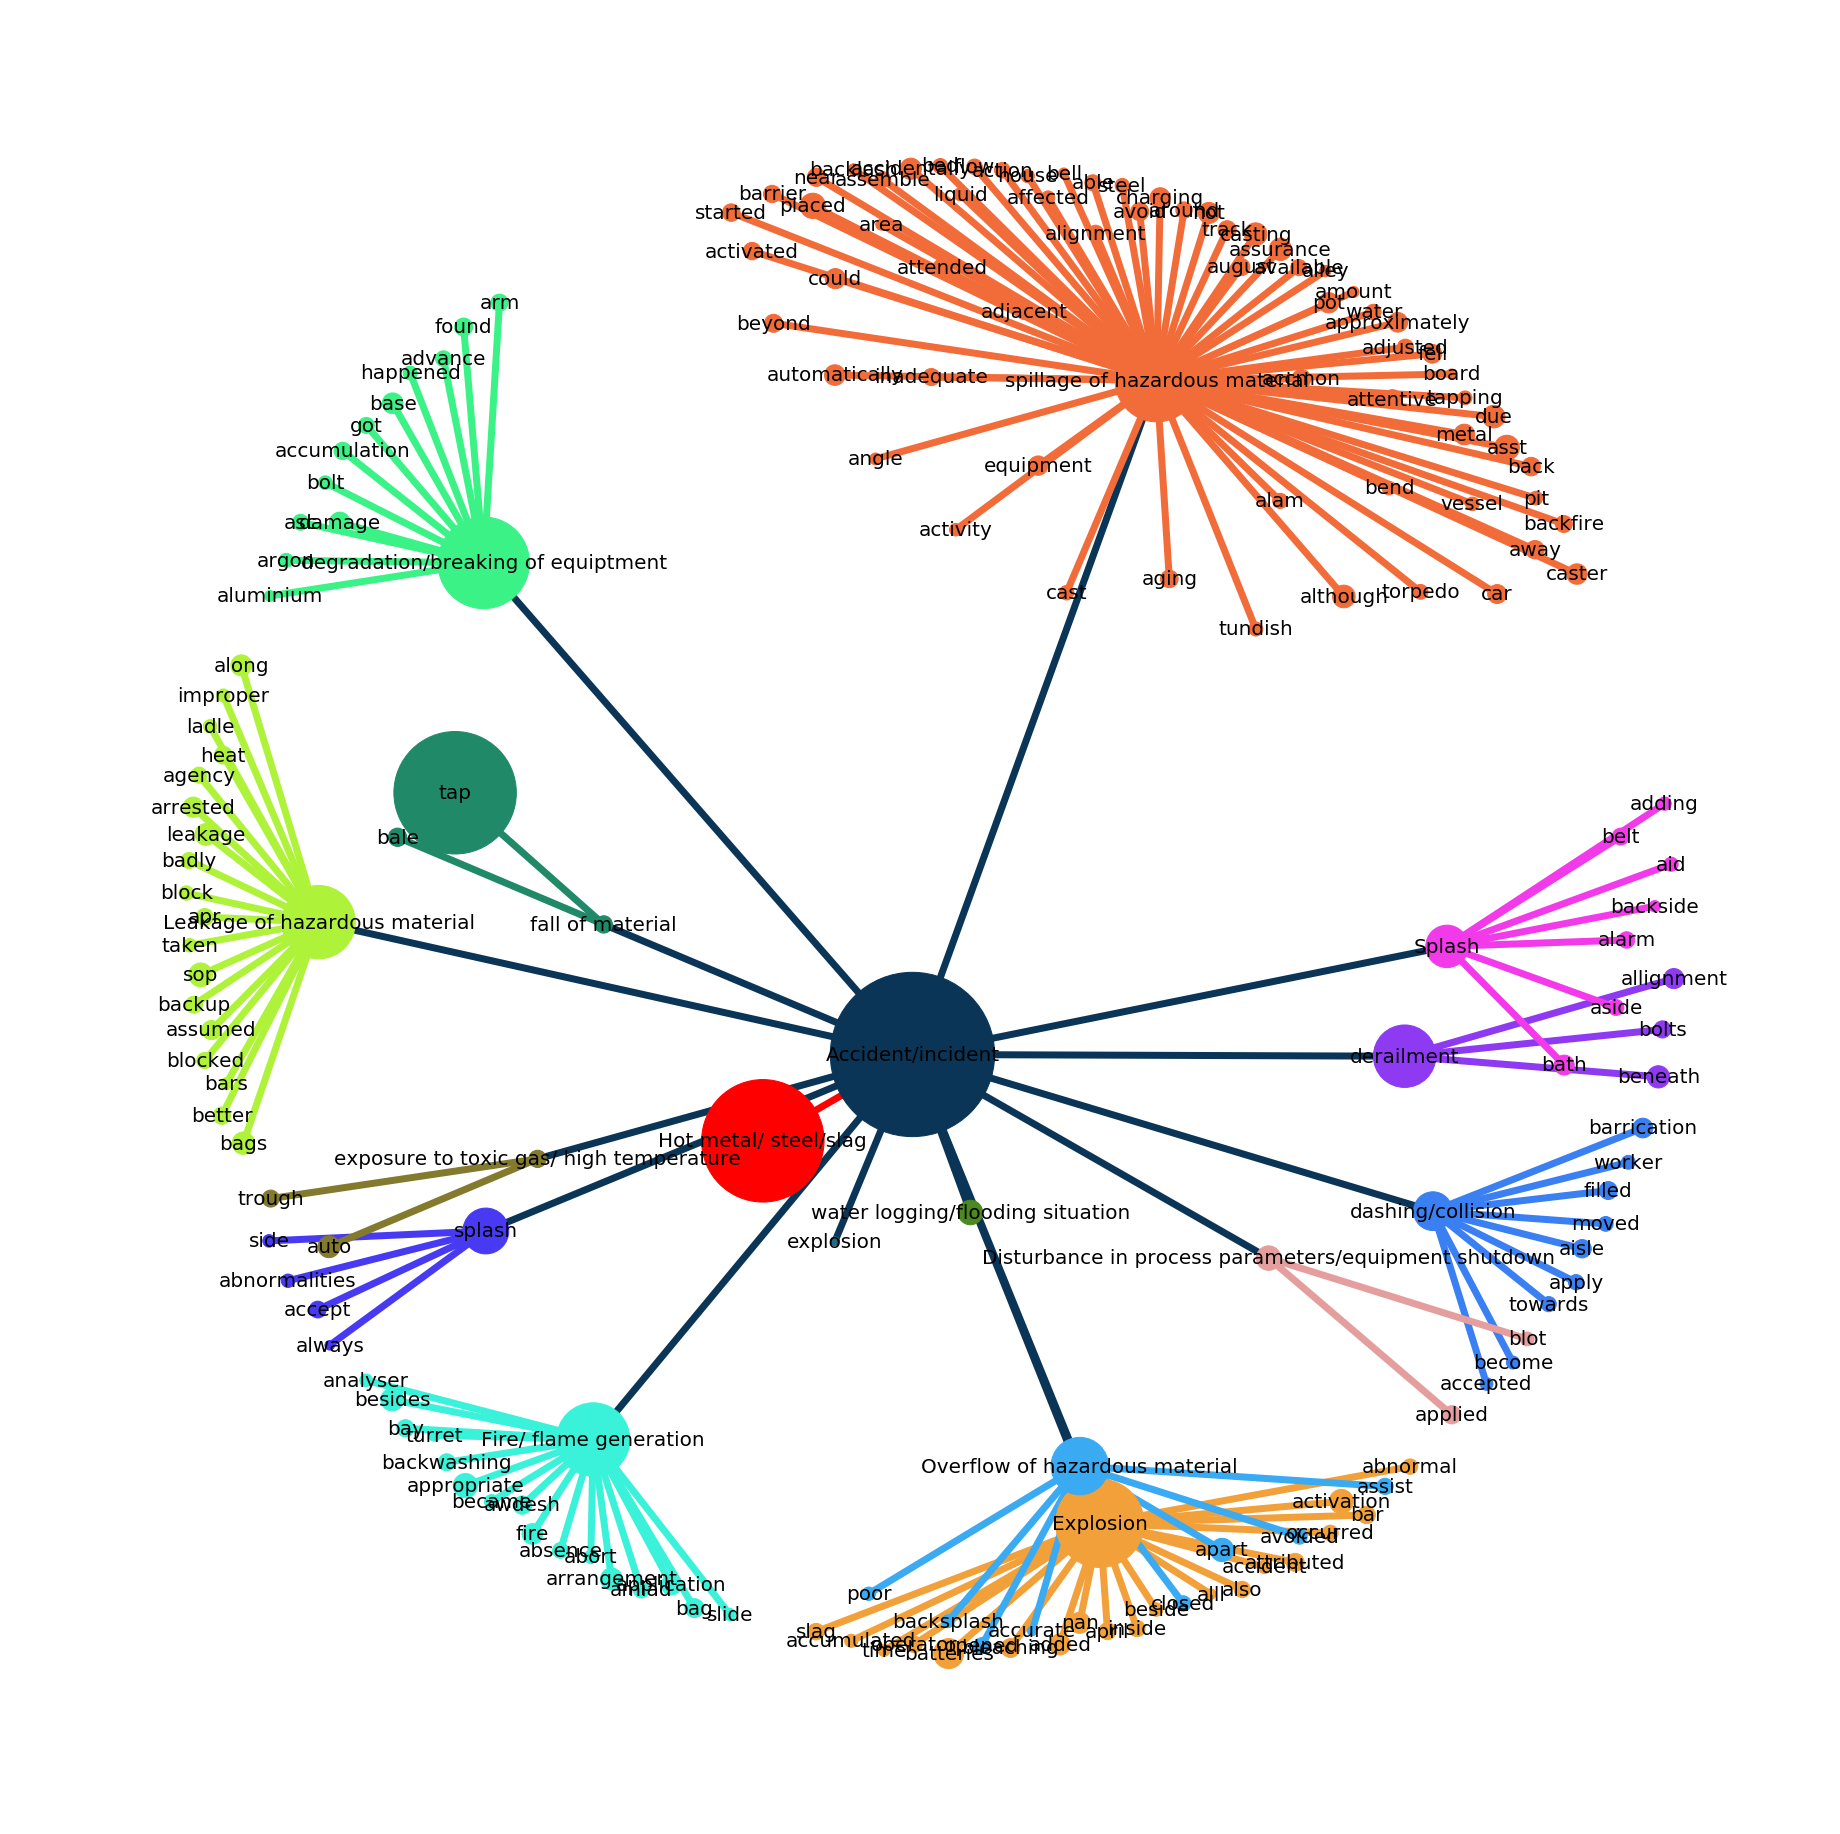

In [601]:
%matplotlib inline
import pylab
from matplotlib.pyplot import figure
from networkx.drawing.nx_agraph import graphviz_layout
pos=nx.spring_layout(G)
plt.figure(figsize=(25,25))
nx.draw(G,pos, node_size=sizes,node_color=color0,edge_color=edge0,edge_cmap=plt.cm.Reds, with_labels = True,arrowsize=5,width=7 ,font_size = 20,  arrows = True)
#edge_labels=dict([((u,v,),d['weight'])
                 #for u,v,d in G.edges(data=True)]
plt.show()